In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = keras.datasets.cifar10

In [4]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

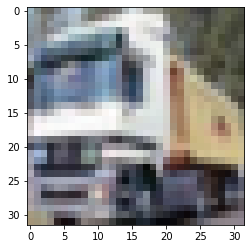

In [5]:
plt.imshow(train_images[1])

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [8]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(32,32,3)),
#     keras.layers.Dense(150, activation="relu"),
#     keras.layers.Dense(10, activation="softmax"),
# ])

# model = keras.Sequential([
#     keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#     keras.layers.MaxPooling2D((2, 2)),
#     keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     keras.layers.MaxPooling2D((2, 2)),
#     keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     keras.layers.Flatten(),
#     keras.layers.Dense(64, activation='relu'),
#     keras.layers.Dense(10, activation='softmax'),
# ])

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                460864    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 462,410
Trainable params: 462,410
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.001, momentum=0.9), 
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [11]:
model.fit(train_images, train_labels, epochs=15)

Train on 50000 samples
Epoch 1/15
50000/50000 [==============================] - 19s 378us/sample - loss: 1.8743 - accuracy: 0.3324
Epoch 2/15
50000/50000 [==============================] - 18s 353us/sample - loss: 1.5465 - accuracy: 0.4527
Epoch 3/15
50000/50000 [==============================] - 18s 367us/sample - loss: 1.3831 - accuracy: 0.5099
Epoch 4/15
50000/50000 [==============================] - 20s 400us/sample - loss: 1.2783 - accuracy: 0.5486
Epoch 5/15
50000/50000 [==============================] - 18s 369us/sample - loss: 1.2043 - accuracy: 0.5783
Epoch 6/15
50000/50000 [==============================] - 20s 391us/sample - loss: 1.1484 - accuracy: 0.5977
Epoch 7/15
50000/50000 [==============================] - 19s 381us/sample - loss: 1.1007 - accuracy: 0.6164
Epoch 8/15
50000/50000 [==============================] - ETA: 0s - loss: 1.0564 - accuracy: 0.63 - 18s 362us/sample - loss: 1.0564 - accuracy: 0.6323
Epoch 9/15
50000/50000 [==============================] - 19s 3

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("Accuracy: ", test_acc)

10000/1 - 1s - loss: 1.0501 - accuracy: 0.6425
Accuracy:  0.6425


In [12]:
prediction = model.predict(test_images)

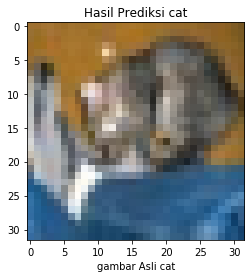

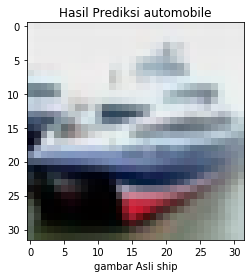

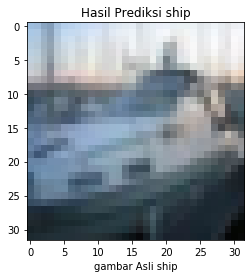

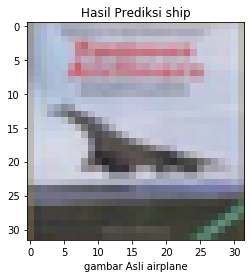

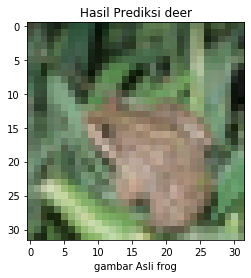

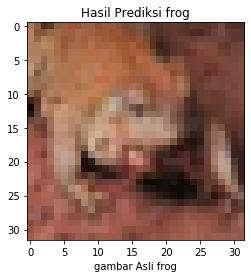

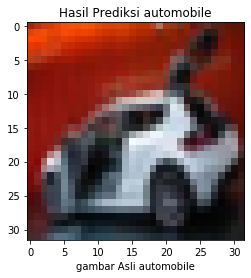

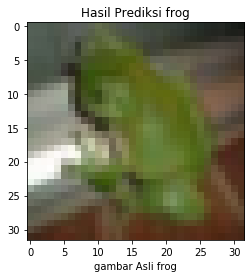

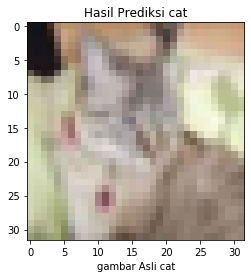

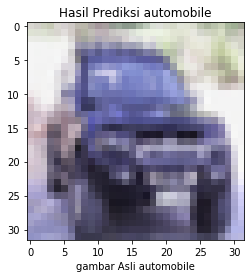

In [13]:
for i in range(10):
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel("gambar Asli " + class_names[test_labels[i][0]])
    plt.title("Hasil Prediksi " + class_names[np.argmax(prediction[i])])
    plt.show()
